<h1> K Means Clustering </h1> 

### Table of Content
1. Data Description
2. Importing the dataset and packages
3. Data visualization
4. Finding Clusters with Elbow Method
5. Building K Means model

### 1. Data Description

### Iris data
Iris is flower having many medicinal importance such as
- Its oil is used as sedative
- Its dried rhizomes help babies in teething

### Attributes  
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   
The data was collected from kaggle. <br>
Please click on the link https://www.kaggle.com/jodx666/iris-is to visit the site & download the data 

### 2. Importing the packages and dataset

In [1]:
# Importing the packages

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Importing the dataset

iris=pd.read_csv("iris.csv")

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Checking the null values in the dataset

iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 3. Data Visualization

#### Box Plot

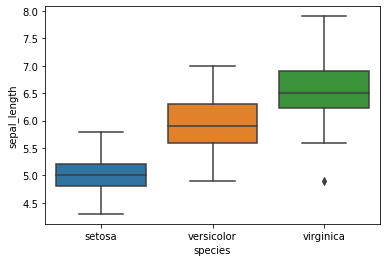

In [9]:
# This shows how comparision of sepal length for different species

sns.boxplot(x = 'species', y='sepal_length', data = iris)

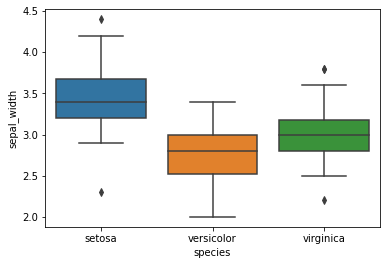

In [10]:
# This shows how comparision of sepal width for different species

sns.boxplot(x = 'species', y='sepal_width', data = iris)

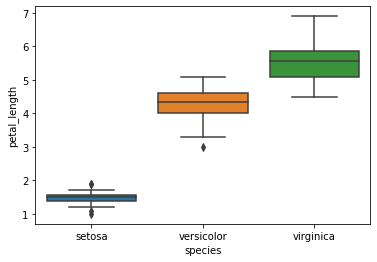

In [11]:
# This shows how comparision of petal length for different species

sns.boxplot(x = 'species', y='petal_length', data = iris)

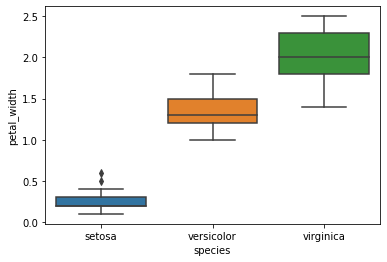

In [12]:
# This shows how comparision of petal width for different species

sns.boxplot(x = 'species', y='petal_width', data = iris)

#### Correlation plot

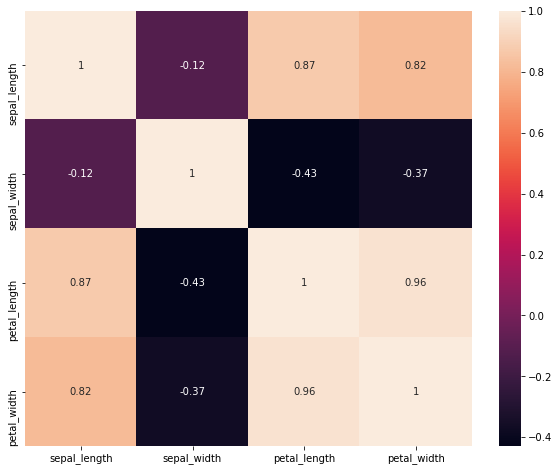

In [13]:
figsize=[10,8]
plt.figure(figsize=figsize)
sns.heatmap(iris.corr(),annot=True)
plt.show()

** Strong positive correlation between ** <br>
sepal length -- petal length <br>
sepal length -- petal width <br>
petal length -- petal width <br>

#### Histogram

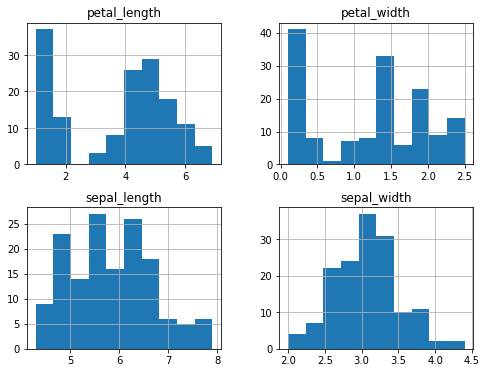

In [14]:
## Shows distribution of the variables
iris.hist(figsize=(8,6))
plt.show()

There is not much variance between the columns. We don't have to perform any scaling.

#### Pairplot

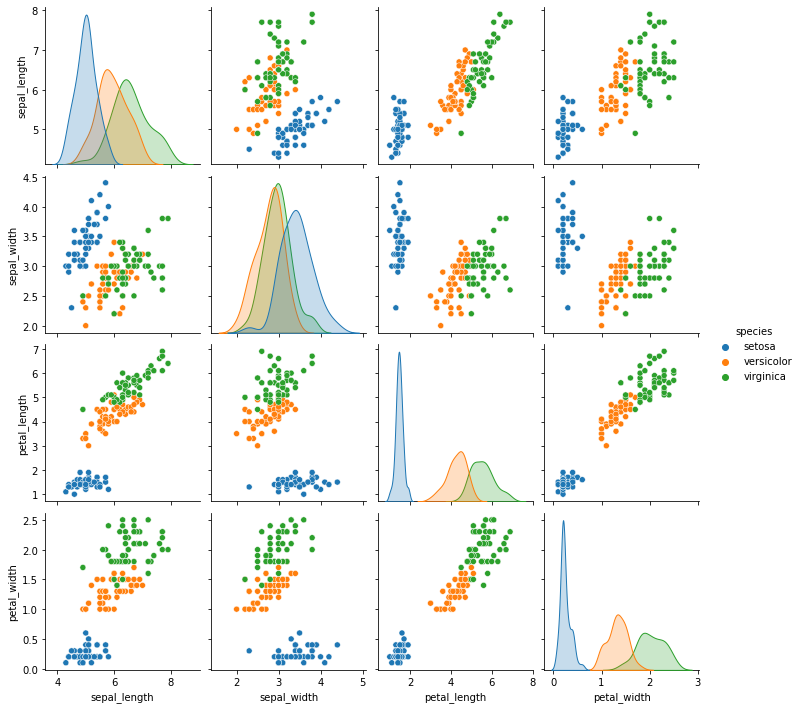

In [15]:
sns.pairplot(iris, hue='species')

** Setosa ** is easily separable using most of the columns.

** We will drop the 'species' column as it is object type which can't be used in clustering**

In [16]:
iris.drop(['species'],axis = 1, inplace=True)

### 4. Finding Clusters with Elbow Method

In [17]:
ssw=[]
cluster_range=range(1,10)
for i in cluster_range:
    model=KMeans(n_clusters=i,init="k-means++",n_init=10, max_iter=300, random_state=0)
    model.fit(iris)
    ssw.append(model.inertia_)

In [18]:
ssw_df=pd.DataFrame({"no. of clusters":cluster_range,"SSW":ssw})
print(ssw_df)

   no. of clusters         SSW
0                1  681.370600
1                2  152.347952
2                3   78.851441
3                4   57.256009
4                5   46.446182
5                6   39.039987
6                7   34.299712
7                8   30.014398
8                9   28.036906


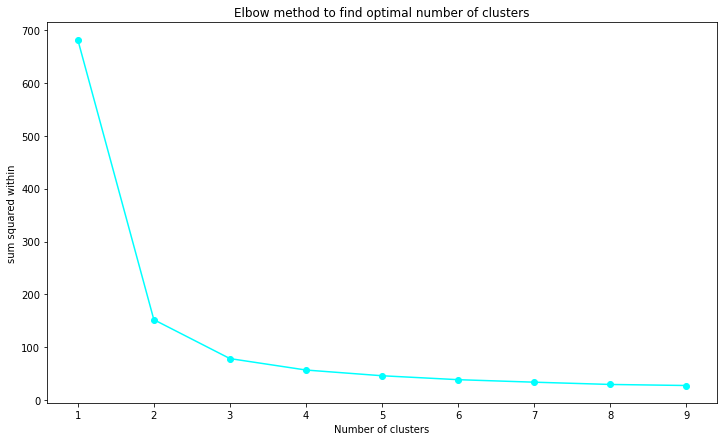

In [19]:
plt.figure(figsize=(12,7))
plt.plot(cluster_range, ssw, marker = "o",color="cyan")
plt.xlabel("Number of clusters")
plt.ylabel("sum squared within")
plt.title("Elbow method to find optimal number of clusters")
plt.show()

** Please notice that we spotted the elbow when number of clusters is 3 and after 3rd cluster there is no significant change in ssw. **

### 5. Building K Means model

In [20]:
# We'll continue our analysis with n_clusters=3
kmeans=KMeans(n_clusters=3, init="k-means++", n_init=10, random_state = 42)
# Fit the model
k_model=kmeans.fit(iris)

In [21]:
y_pred=kmeans.predict(iris)
y_pred

#We can also use 
#clusters=k_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

** So the observations belongs to 3 clusters ** <br>
This is very similar to the 3 species which the flowers belong to.

In [23]:
iris['clusters']=y_pred
print(iris.head())
print(iris.tail())

   sepal_length  sepal_width  petal_length  petal_width  clusters
0           5.1          3.5           1.4          0.2         1
1           4.9          3.0           1.4          0.2         1
2           4.7          3.2           1.3          0.2         1
3           4.6          3.1           1.5          0.2         1
4           5.0          3.6           1.4          0.2         1
     sepal_length  sepal_width  petal_length  petal_width  clusters
145           6.7          3.0           5.2          2.3         2
146           6.3          2.5           5.0          1.9         0
147           6.5          3.0           5.2          2.0         2
148           6.2          3.4           5.4          2.3         2
149           5.9          3.0           5.1          1.8         0


Cluster 0 -- versicolor <br>
Cluster 1 -- Setosa <br>
Cluster 2 -- Virginica <br>

In [24]:
## Size of each cluster
iris['clusters'].value_counts()

0    62
1    50
2    38
Name: clusters, dtype: int64

In [25]:
# Centroid of each clusters
centroid_df = pd.DataFrame(k_model.cluster_centers_, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
centroid_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


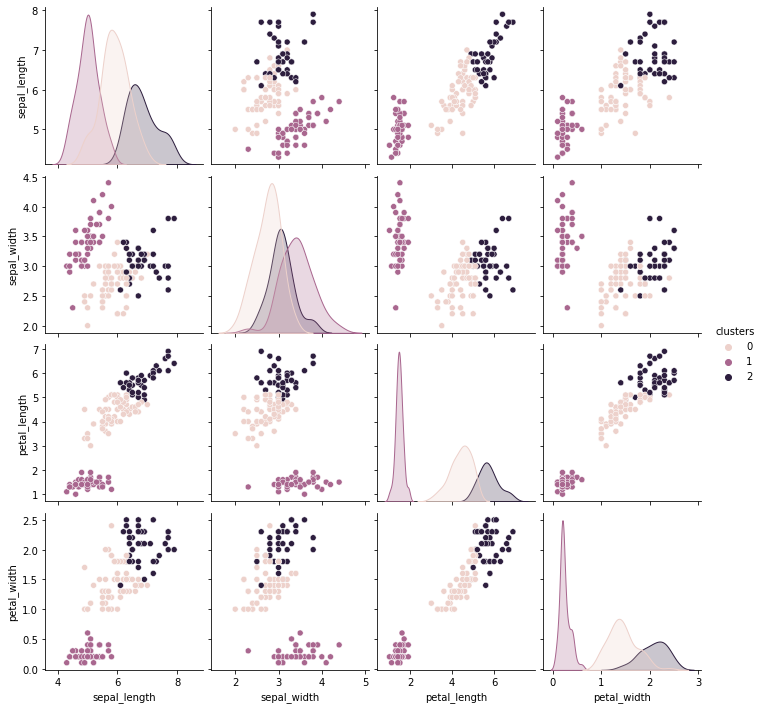

In [26]:
### Visualizing the cluster based on each pair of columns

sns.pairplot(iris, hue='clusters')